Proposed method With Mean Imputation - Local Dataset

In [1]:
import pandas as p
data = p.read_csv('N:\STUDY\SEM_8\Capstone\Fusion-Based Ensemble Learning Framework for Enhanced Diabetes Classification\Codes\Local HealthCare.csv')

In [2]:
data.head(5)

,No. of Pregnancy,Age,BMI,BP(Systolic),BP(Diastolic),Genetic,Insulin,Skin Thickness(mm),Glucose Consumption,Outcome
0,3,50,22.263762,140,90,0,0,317.50,14.6,1
1,1,40,24.111159,110,80,2,0,317.50,6.1,0
2,0,21,17.183204,120,80,0,0,259.08,9.7,1
3,2,30,21.244332,130,85,0,0,322.58,17.8,1
4,2,35,22.819490,110,75,0,0,335.28,16.7,1


In [3]:
print(data.isnull().sum())

No. of Pregnancy       0
Age                    0
BMI                    0
BP(Systolic)           0
BP(Diastolic)          0
Genetic                0
Insulin                0
Skin Thickness(mm)     0
Glucose Consumption    0
Outcome                0
dtype: int64


In [4]:
print(data['Outcome'].value_counts())

Outcome
1    372
0     93
Name: count, dtype: int64


In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

z_scores = np.abs((data - data.mean()) / data.std())

# Set threshold (commonly 3) to detect outliers
outlier_threshold = 3
outliers = (z_scores > outlier_threshold)

# Count the number of outliers in each column
outlier_counts = outliers.sum()
print("Outliers detected per column (Z-score method):")
print(outlier_counts)

Outliers detected per column (Z-score method):
No. of Pregnancy       9
Age                    2
BMI                    4
BP(Systolic)           2
BP(Diastolic)          5
Genetic                5
Insulin                2
Skin Thickness(mm)     1
Glucose Consumption    4
Outcome                0
dtype: int64


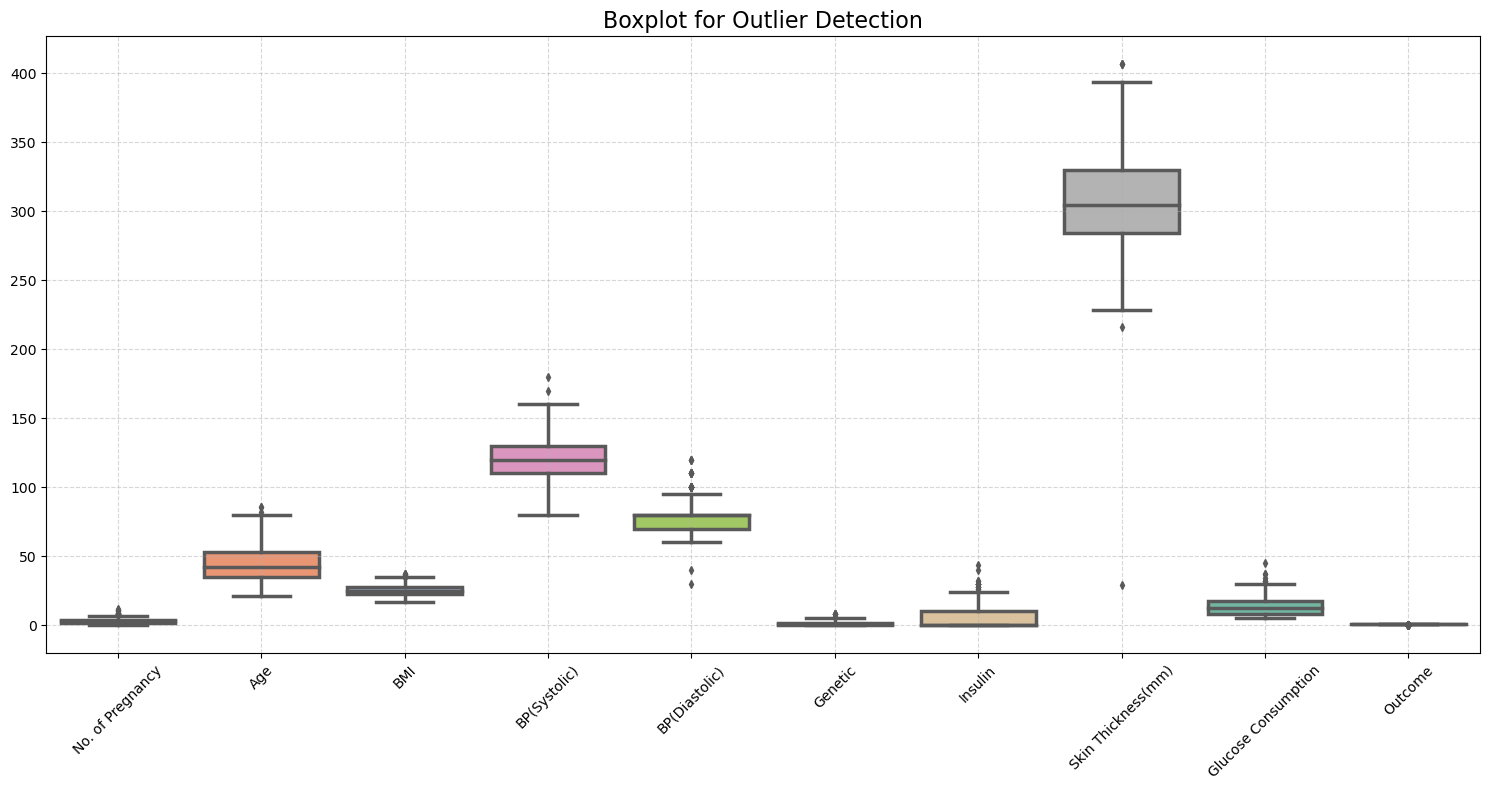

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 8))
sns.boxplot(data=data, palette="Set2", linewidth=2.5, fliersize=4)
plt.title('Boxplot for Outlier Detection', fontsize=16)
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


In [7]:
# Function to detect outliers using IQR
def detect_outliers_iqr(data):
    Q1 = data.quantile(0.25)  # First quartile (25th percentile)
    Q3 = data.quantile(0.75)  # Third quartile (75th percentile)
    IQR = Q3 - Q1  # Interquartile range
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return (data < lower_bound) | (data > upper_bound)

# Apply IQR method
outliers_iqr = data.apply(detect_outliers_iqr)

# Count outliers per column
print("Outliers detected per column (IQR method):")
print(outliers_iqr.sum())


Outliers detected per column (IQR method):
No. of Pregnancy       15
Age                     3
BMI                     9
BP(Systolic)            2
BP(Diastolic)          33
Genetic                12
Insulin                18
Skin Thickness(mm)      5
Glucose Consumption     7
Outcome                93
dtype: int64


In [8]:
import numpy as np

# Replace outliers with median values, except for the "Outcome" column
for col in data.columns:
    if col != "Outcome":  # Skip the Outcome column
        mean_value = data[col].mean()
        data[col] = np.where(outliers_iqr[col], mean_value, data[col])

# Confirm that outliers are handled
print("Outliers replaced with mean values (excluding Outcome column).")


Outliers replaced with mean values (excluding Outcome column).


In [9]:
print(data['Outcome'].value_counts())

Outcome
1    372
0     93
Name: count, dtype: int64


In [10]:
X = data.drop(columns=['Outcome'])
y = data['Outcome']

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [12]:
from sklearn.preprocessing import StandardScaler # type: ignore
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "SVM": SVC(),
    "K-Nearest Neighbors": KNeighborsClassifier()
}


In [14]:
from sklearn.metrics import accuracy_score
for name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test)
    
    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    
    print(f"{name} Accuracy: {accuracy:.2f}")

Logistic Regression Accuracy: 0.96
Decision Tree Accuracy: 1.00
Random Forest Accuracy: 1.00
SVM Accuracy: 0.90
K-Nearest Neighbors Accuracy: 0.83


Proposed Method with Mean Imputation

In [15]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

log_reg = LogisticRegression(max_iter=500, solver='saga', random_state=42)
svm = SVC(probability=True, random_state=42)
rf_model = RandomForestClassifier(random_state=42)

# Train models
log_reg.fit(X_train, y_train)
svm.fit(X_train, y_train)
rf_model.fit(X_train, y_train)

# Get probability scores for each class (shape: [num_samples, num_classes])
log_prob = log_reg.predict_proba(X_test)
svm_prob = svm.predict_proba(X_test)
rf_prob = rf_model.predict_proba(X_test)

#  Step 1: Multiply probabilities for each class across models
final_prob = log_prob * svm_prob * rf_prob  # Element-wise multiplication

#  Step 2: Select the class with the highest probability
final_prediction = np.argmax(final_prob, axis=1)  # Class with max probability

# Calculate accuracy
final_accuracy = accuracy_score(y_test, final_prediction)

# Print results
print(f"Final Model Accuracy: {final_accuracy:.4f}")


Final Model Accuracy: 0.9929


5 Fold Cross Validation for Proposed Method with Mean Imputation

In [16]:
import pandas as pd
import numpy as np
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

#  Initialize Stratified 5-Fold Cross-Validation
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

#  Initialize lists to store accuracy scores
accuracies = []

for train_index, test_index in kf.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    #  Apply Feature Scaling
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    # Define models
    log_reg = LogisticRegression(max_iter=500, solver='saga', random_state=42)
    svm = SVC(probability=True, random_state=42)
    rf_model = RandomForestClassifier(random_state=42)

    # Train models
    log_reg.fit(X_train, y_train)
    svm.fit(X_train, y_train)
    rf_model.fit(X_train, y_train)

    # Get probability scores for each class (shape: [num_samples, num_classes])
    log_prob = log_reg.predict_proba(X_test)
    svm_prob = svm.predict_proba(X_test)
    rf_prob = rf_model.predict_proba(X_test)

    #  Multiply the probabilities for each class across models
    final_prob = log_prob * svm_prob * rf_prob  # Element-wise multiplication

    #  Select the class with the highest probability
    final_prediction = np.argmax(final_prob, axis=1)

    # Calculate accuracy for this fold
    fold_accuracy = accuracy_score(y_test, final_prediction)
    accuracies.append(fold_accuracy)

    print(f"Fold Accuracy: {fold_accuracy:.4f}")

#  Calculate & Print Average Accuracy
final_accuracy = np.mean(accuracies)
print(f"\nFinal 5-Fold Cross-Validation Accuracy: {final_accuracy:.4f}")


Fold Accuracy: 0.9785
Fold Accuracy: 0.9570
Fold Accuracy: 1.0000
Fold Accuracy: 1.0000
Fold Accuracy: 0.9892

Final 5-Fold Cross-Validation Accuracy: 0.9849


Using SMOTE()

In [17]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler

#  Split dataset into 80% train and 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

#  Apply SMOTE to the training set only
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

#  Apply Feature Scaling (StandardScaler)
scaler = StandardScaler()
X_train_resampled = scaler.fit_transform(X_train_resampled)
X_test = scaler.transform(X_test)

#  Print Class Distribution Before and After SMOTE
print("Class Distribution Before SMOTE:\n", y_train.value_counts())
print("\nClass Distribution After SMOTE:\n", pd.Series(y_train_resampled).value_counts())



Class Distribution Before SMOTE:
 Outcome
1    260
0     65
Name: count, dtype: int64

Class Distribution After SMOTE:
 Outcome
1    260
0    260
Name: count, dtype: int64


In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier( random_state=44),
    "SVM": SVC(),
    "K-Nearest Neighbors": KNeighborsClassifier()
}


In [19]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score


#  Train models and evaluate accuracy
for name, model in models.items():
    model.fit(X_train_resampled, y_train_resampled)  # Train the model
    y_pred = model.predict(X_test)  # Predict on test set
    accuracy = accuracy_score(y_test, y_pred)  # Compute accuracy
    print(f"{name} Accuracy: {accuracy:.4f}")  # Print accuracy


Logistic Regression Accuracy: 0.9286
Decision Tree Accuracy: 1.0000
Random Forest Accuracy: 1.0000
SVM Accuracy: 0.8786
K-Nearest Neighbors Accuracy: 0.7286


Proposed Method with Mean Imputation After SMOTE() Applied

In [20]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

#  Train three ML models
log_reg = LogisticRegression(max_iter=1000, solver='saga', random_state=42)
svm = SVC(probability=True, random_state=42)
rf_model = RandomForestClassifier(random_state=42)

log_reg.fit(X_train_resampled, y_train_resampled)
svm.fit(X_train_resampled, y_train_resampled)
rf_model.fit(X_train_resampled, y_train_resampled)

#  Get probability scores for each class
log_prob = log_reg.predict_proba(X_test)
svm_prob = svm.predict_proba(X_test)
rf_prob = rf_model.predict_proba(X_test)

#   Multiply probabilities for each class (element-wise)
final_prob = log_prob * svm_prob * rf_prob

#  Select the class with the highest probability
final_prediction = np.argmax(final_prob, axis=1)

#  Calculate accuracy
final_accuracy = accuracy_score(y_test, final_prediction)

#  Print results
print(f"Final Model Accuracy (SMOTE Applied): {final_accuracy:.4f}")


Final Model Accuracy (SMOTE Applied): 0.9643


5 Fold CV Proposed Method with Mean Imputation After SMOTE() Applied

In [21]:
import pandas as pd
import numpy as np
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

#  Initialize Stratified 5-Fold Cross-Validation
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

#  Initialize lists to store accuracy scores
accuracies = []

for train_index, test_index in kf.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    #  Apply Feature Scaling
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    # Define models
    log_reg = LogisticRegression(max_iter=500, solver='saga', random_state=42)
    svm = SVC(probability=True, random_state=42)
    rf_model = RandomForestClassifier(random_state=42)

    # Train models
    log_reg.fit(X_train, y_train)
    svm.fit(X_train, y_train)
    rf_model.fit(X_train, y_train)

    # Get probability scores for each class (shape: [num_samples, num_classes])
    log_prob = log_reg.predict_proba(X_test)
    svm_prob = svm.predict_proba(X_test)
    rf_prob = rf_model.predict_proba(X_test)

    #  Multiply the probabilities for each class across models
    final_prob = log_prob * svm_prob * rf_prob  # Element-wise multiplication

    #  Select the class with the highest probability
    final_prediction = np.argmax(final_prob, axis=1)

    # Calculate accuracy for this fold
    fold_accuracy = accuracy_score(y_test, final_prediction)
    accuracies.append(fold_accuracy)

    print(f"Fold Accuracy: {fold_accuracy:.4f}")

#  Calculate & Print Average Accuracy
final_accuracy = np.mean(accuracies)
print(f"\nFinal 5-Fold Cross-Validation Accuracy: {final_accuracy:.4f}")


Fold Accuracy: 0.9785
Fold Accuracy: 0.9570
Fold Accuracy: 1.0000
Fold Accuracy: 1.0000
Fold Accuracy: 0.9892

Final 5-Fold Cross-Validation Accuracy: 0.9849
